## **Incêndios Florestais no Brasil** <p>


# Lendo e tratando Dados

In [12]:
#Importando bibliotecas para modelagem e matrizes
import numpy as np
import pandas as pd

#Importando bibliotecas para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

#Importando biblioteca para ignorar avisos
import warnings

#Desabilitando avisos
warnings.filterwarnings('ignore')

In [13]:
#Carregando a base de dados
Base_Dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos Práticos - Curso DataV/Projeto Incêndios Florestais/Dados_Indendio.csv', encoding='latin-1')
Base_Dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [14]:
#Verificando se há campos nulos na base de dados
Base_Dados.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


In [15]:
#Verificando informações da base de dados
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [16]:
#Estatísticas da base de dados
Base_Dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [17]:
#Verificando campos únicos na base de dados
Base_Dados.nunique()

,0
year,20
state,23
month,12
number,1479
date,20


Através das análises, concluímos que a base de dados:
- Possui 6454 registros de incêndios florestais;
- Dados do tipo inteiro, float e string;
- Não possui campos nulos.

# Análise Gráfica

In [18]:
#Agrupando Total geral de queimadas por ano
Total_Geral_Ano = Base_Dados.groupby('year').sum().reset_index()[['year', 'number']]

Total_Geral_Ano

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


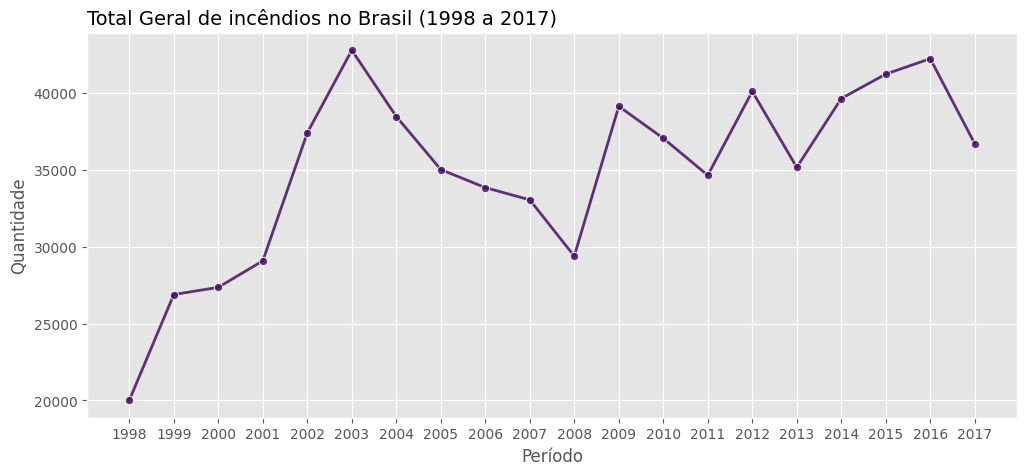

In [19]:
#Tamanho
plt.figure(figsize=(12,5))

#Estilo do Gráfico
plt.style.use('ggplot')

#Gráfico
plt.title('Total Geral de incêndios no Brasil (1998 a 2017)', loc='left', fontsize=14)
sns.lineplot(data=Total_Geral_Ano, x='year', y='number', estimator='sum', lw=2, color='#471063', alpha=0.85, marker='o')

#Labels
plt.xlabel('Período')
plt.xticks(Total_Geral_Ano['year'].unique())
plt.ylabel('Quantidade');

In [20]:
#Agrupando a quantidade de queimadas por meses e anos
Total_Geral_Meses = Base_Dados.groupby(['year', 'month']).sum().reset_index()[['year', 'month', 'number']]

Total_Geral_Meses.head()

,year,month,number
0,1998,Abril,0.000
1,1998,Agosto,3964.616
2,1998,Dezembro,2043.407
3,1998,Fevereiro,0.000
4,1998,Janeiro,0.000


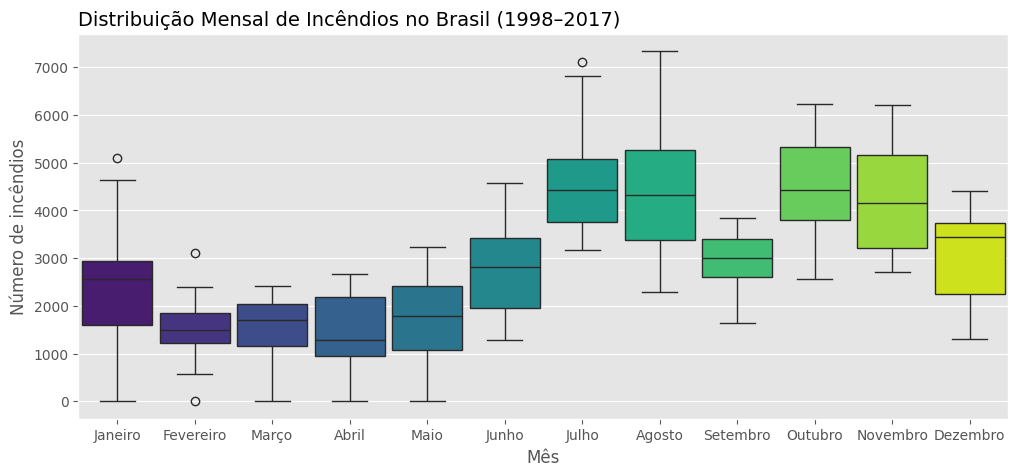

In [21]:
#Tamanho
plt.figure(figsize=(12,5))


#Estilo do Gráfico
plt.style.use('ggplot')

#Gráfico
plt.title('Distribuição Mensal de Incêndios no Brasil (1998–2017)', loc='left', fontsize=14)
sns.boxplot(data=Total_Geral_Meses, x='month', y='number', palette="viridis", saturation=1, width=0.9, linewidth=1,
            order=['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'] #Ordenando os meses
            )

#Labels
plt.xlabel('Mês')
plt.ylabel('Número de incêndios');

In [22]:
#Agrupando o total de queimadas ao longo dos anos por estado
Total_Geral_Estados = Base_Dados.groupby(['state']).sum().reset_index()[['state', 'number']].sort_values(by='number', ascending=False) #Agrupa por estado, soma os números de incêndios, reseta o index, informa que só queremos as colunas state e number e ordena a lista do estado com maior número de queimadas para o menor

Total_Geral_Estados.head()

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226


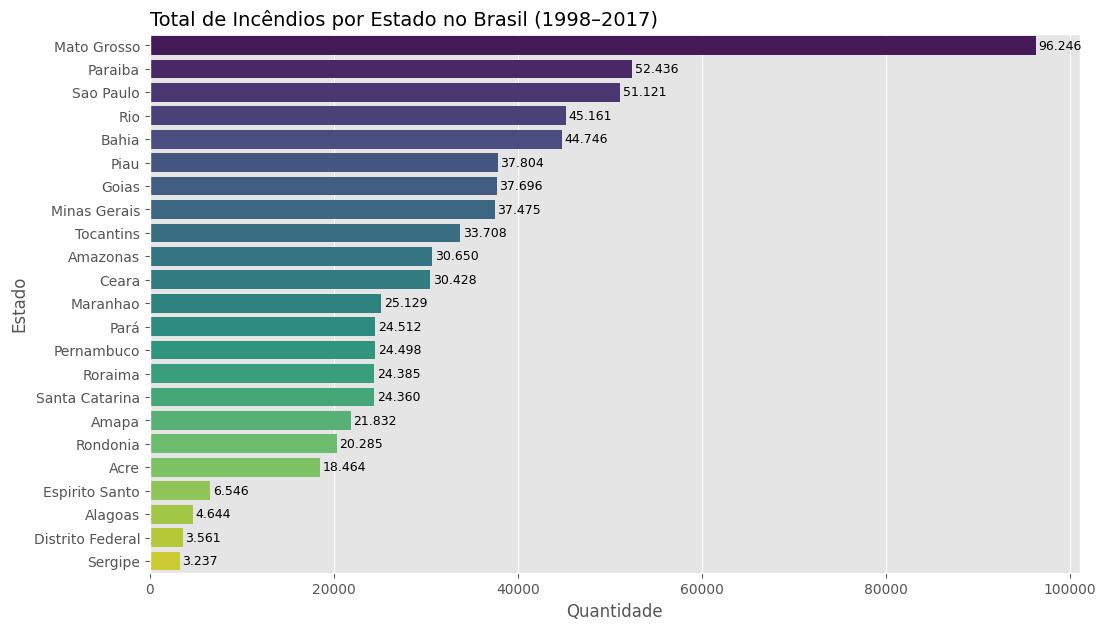

In [23]:
#Tamanho
plt.figure(figsize=(12,7))

#Paleta de cores
paleta_cores = sns.color_palette('viridis', n_colors=23) #Criando uma paleta de cores com a mesma quantidade de estados no gráfico

#Estilo do Gráfico
plt.style.use('ggplot')

#Gráfico
plt.title('Total de Incêndios por Estado no Brasil (1998–2017)', loc='left', fontsize=14)

#Gráfico
sns.barplot(data=Total_Geral_Estados, y='state', x='number', palette='viridis', order=Total_Geral_Estados.sort_values('number', ascending=False)['state']) #gera o gráfico com a ordem decrescente de estados com incidência de queimadas

for index, value in enumerate(Total_Geral_Estados['number']): #Inserir rótulos nas barras do gráfico
    valor_formatado = f'{value:,.0f}'.replace(',', '.')  # Formata com milhar e substitui vírgula por ponto
    plt.text(value + 300, index, valor_formatado, va='center', fontsize=9)

#Labels
plt.ylabel('Estado')
plt.xlabel('Quantidade');

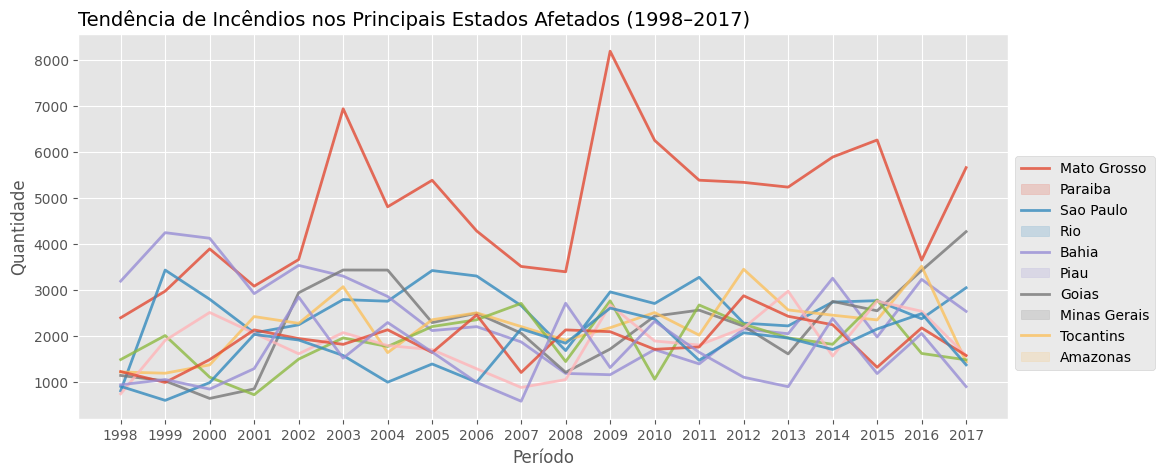

In [24]:
#Estados Top 10
Lista_TOP10 = Total_Geral_Estados['state'][0:10] #Gerando uma lista com apenas os 10 primeiros registros da coluna state

#Tamanho
plt.figure(figsize=(12,5))

#Gráfico
plt.title('Tendência de Incêndios nos Principais Estados Afetados (1998–2017)', loc='left', fontsize=14)

for Coluna in Lista_TOP10:
  Filtro = Base_Dados.loc[Base_Dados['state'] == Coluna] #Criando um filtro para cada estado
  Analise_Local = Filtro.groupby(['year']).sum().reset_index() #Agrupando os valores para sumarizar

  #Plot
  sns.lineplot(data=Analise_Local, x='year', y='number', lw=2, alpha=0.8)

#Labels
plt.xlabel('Período')
plt.xticks(Base_Dados['year'].unique())
plt.ylabel('Quantidade')

#Legenda
plt.legend(Lista_TOP10, bbox_to_anchor=(1, 0.7));

In [25]:
# Plot Geográfico

# Gerando os estados e ordenando em ordem alfabética
Estados = Total_Geral_Estados.sort_values('state')['state'].values

# Gerando os valores de incêndios
Valores = Total_Geral_Estados.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizados os dados em um dicionário
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

# Lendo o dicionario
Analise_Geografica = pd.DataFrame ( Dicionario )

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [31]:
#Fazendo o plot
import plotly.express as px

#Mapa de calor geográfico
grafico = px.density_mapbox(
    Analise_Geografica, #Dados
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=40,
    center=dict(lat=-13.700, lon=-55.5555),
    zoom=3,
    mapbox_style='open-street-map'
)
#grafico.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) #Remove a margem branca que fica nas bordas do gráfico
grafico.update_layout(
    width=800,  # largura em pixels
    height=500,  # altura em pixels
    title='Distribuição Geográfica dos Incêndios Florestais no Brasil (1998–2017)',
    title_x=0.5,  # Centraliza o título
    margin={"r":0, "t":40, "l":0, "b":0}  # espaço para o título (aumenta top)
)
grafico.show()